In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")
csv_files = [f"{path}/{fp}" for fp in os.listdir(path)]
csv_files

print(f"Reading {csv_files[0].split('/')[-1]}")
dataset = pd.read_csv(csv_files[0])

for filepath in csv_files[1:]:
    if filepath.split("/")[-1] in (
        "unclean focus.csv", "unclean cclass.csv",
        "cclass.csv", "focus.csv"
    ):
        continue

    print(f"Reading {filepath.split('/')[-1]}")
    tmp_dataset = pd.read_csv(filepath)
    if "tax(£)" in tmp_dataset.columns:
        tmp_dataset.rename(columns={"tax(£)": "tax"}, inplace=True)

    dataset = pd.concat([dataset, tmp_dataset], axis=0)

dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Reading ford.csv
Reading merc.csv
Reading audi.csv
Reading toyota.csv
Reading hyundi.csv
Reading skoda.csv
Reading vw.csv
Reading vauxhall.csv
Reading bmw.csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
print(f"Dataset size: {dataset.shape[0]}")

Dataset size: 99187


In [4]:
dataset.rename(columns={"price": "y"}, inplace=True)
dataset.head()

,model,year,y,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
print(f"Total unique values in 'model' columns: {len(dataset['model'].unique())}")
print(f"Total unique values in 'transmission' columns: {len(dataset['transmission'].unique())}")
print(f"Total unique values in 'fuelType' columns: {len(dataset['fuelType'].unique())}")

Total unique values in 'model' columns: 195
Total unique values in 'transmission' columns: 4
Total unique values in 'fuelType' columns: 5


In [6]:
dataset.isna().sum()

model           0
year            0
y               0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

transmission_le = LabelEncoder()
dataset["transmission"] = transmission_le.fit_transform(dataset["transmission"])

fuelType = LabelEncoder()
dataset["fuelType"] = fuelType.fit_transform(dataset["fuelType"])

dataset = pd.get_dummies(
    dataset, columns=["model"], prefix="model",
    drop_first=False, dtype=int
)

dataset.head()

,year,y,transmission,mileage,fuelType,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,model_ C-MAX,model_ CC,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Camry,model_ Caravelle,model_ Cascada,model_ Citigo,model_ Combo Life,model_ Corolla,model_ Corsa,model_ Crossland X,model_ E Class,model_ EcoSport,model_ Edge,model_ Eos,model_ Escort,model_ Fabia,model_ Fiesta,model_ Focus,model_ Fox,model_ Fusion,model_ G Class,model_ GL Class,model_ GLA Class,model_ GLB Class,model_ GLC Class,model_ GLE Class,model_ GLS Class,model_ GT86,model_ GTC,model_ Galaxy,model_ Getz,model_ Golf,model_ Golf SV,model_ Grand C-MAX,model_ Grand Tourneo Connect,model_ Grandland X,model_ Hilux,model_ I10,model_ I20,model_ I30,model_ I40,model_ I800,model_ IQ,model_ IX20,model_ IX35,model_ Insignia,model_ Ioniq,model_ Jetta,model_ KA,model_ Ka+,model_ Kadjar,model_ Kamiq,model_ Karoq,model_ Kodiaq,model_ Kona,model_ Kuga,model_ Land Cruiser,model_ M Class,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ Meriva,model_ Mokka,model_ Mokka X,model_ Mondeo,model_ Mustang,model_ Octavia,model_ PROACE VERSO,model_ Passat,model_ Polo,model_ Prius,model_ Puma,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R Class,model_ R8,model_ RAV4,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ Ranger,model_ Rapid,model_ Roomster,model_ S Class,model_ S-MAX,model_ S3,model_ S4,model_ S5,model_ S8,model_ SL CLASS,model_ SLK,model_ SQ5,model_ SQ7,model_ Santa Fe,model_ Scala,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ Streetka,model_ Superb,model_ Supra,model_ T-Cross,model_ T-Roc,model_ TT,model_ Terracan,model_ Tigra,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_ Tucson,model_ Up,model_ Urban Cruiser,model_ V Class,model_ Vectra,model_ Veloster,model_ Verso,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i3,model_ i8,model_180,model_200,model_220,model_230
0,2017,12000,0,15944,4,150,57.7,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,14000,1,9083,4,150,57.7,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,13000,1,12456,4,150,57.7,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,1750

In [10]:
dataset[["year", "y", "transmission", "mileage", "fuelType", "tax", "mpg", "engineSize"]].describe()

,year,y,transmission,mileage,fuelType,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,1.255144,23058.914213,2.284725,120.299838,55.166825,1.663280
std,2.123934,9866.773417,1.025535,21148.523721,1.946070,63.150926,16.138522,0.557646
min,1970.000000,450.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,1.000000,7425.000000,0.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,1.000000,17460.000000,4.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,1.000000,32339.000000,4.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,3.000000,323000.000000,4.000000,580.000000,470.800000,6.600000


In [11]:
from sklearn.preprocessing import StandardScaler

normalize_columns = ["year", "y", "mileage", "tax", "mpg"]
scaler = StandardScaler()
dataset[normalize_columns] = scaler.fit_transform(dataset[normalize_columns])

dataset[normalize_columns].head()

,year,y,mileage,tax,mpg
0,-0.041302,-0.487026,-0.336428,0.470307,0.156965
1,0.429524,-0.284324,-0.660849,0.470307,0.156965
2,-0.041302,-0.385675,-0.501357,0.470307,0.156965
3,0.900351,0.070404,-0.595738,0.391131,-0.921206
4,0.900351,-0.030947,-1.020261,0.391131,-0.400709


In [12]:
dataset.describe()

,year,y,transmission,mileage,fuelType,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,model_ C-MAX,model_ CC,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Camry,model_ Caravelle,model_ Cascada,model_ Citigo,model_ Combo Life,model_ Corolla,model_ Corsa,model_ Crossland X,model_ E Class,model_ EcoSport,model_ Edge,model_ Eos,model_ Escort,model_ Fabia,model_ Fiesta,model_ Focus,model_ Fox,model_ Fusion,model_ G Class,model_ GL Class,model_ GLA Class,model_ GLB Class,model_ GLC Class,model_ GLE Class,model_ GLS Class,model_ GT86,model_ GTC,model_ Galaxy,model_ Getz,model_ Golf,model_ Golf SV,model_ Grand C-MAX,model_ Grand Tourneo Connect,model_ Grandland X,model_ Hilux,model_ I10,model_ I20,model_ I30,model_ I40,model_ I800,model_ IQ,model_ IX20,model_ IX35,model_ Insignia,model_ Ioniq,model_ Jetta,model_ KA,model_ Ka+,model_ Kadjar,model_ Kamiq,model_ Karoq,model_ Kodiaq,model_ Kona,model_ Kuga,model_ Land Cruiser,model_ M Class,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ Meriva,model_ Mokka,model_ Mokka X,model_ Mondeo,model_ Mustang,model_ Octavia,model_ PROACE VERSO,model_ Passat,model_ Polo,model_ Prius,model_ Puma,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R Class,model_ R8,model_ RAV4,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ Ranger,model_ Rapid,model_ Roomster,model_ S Class,model_ S-MAX,model_ S3,model_ S4,model_ S5,model_ S8,model_ SL CLASS,model_ SLK,model_ SQ5,model_ SQ7,model_ Santa Fe,model_ Scala,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ Streetka,model_ Superb,model_ Supra,model_ T-Cross,model_ T-Roc,model_ TT,model_ Terracan,model_ Tigra,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_ Tucson,model_ Up,model_ Urban Cruiser,model_ V Class,model_ Vectra,model_ Veloster,model_ Verso,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i3,model_ i8,model_180,model_200,model_220,model_230
count,9.918700e+04,9.918700e+04,99187.000000,9.918700e+04,99187.000000,9.918700e+04,9.918700e+04,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.00000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,991

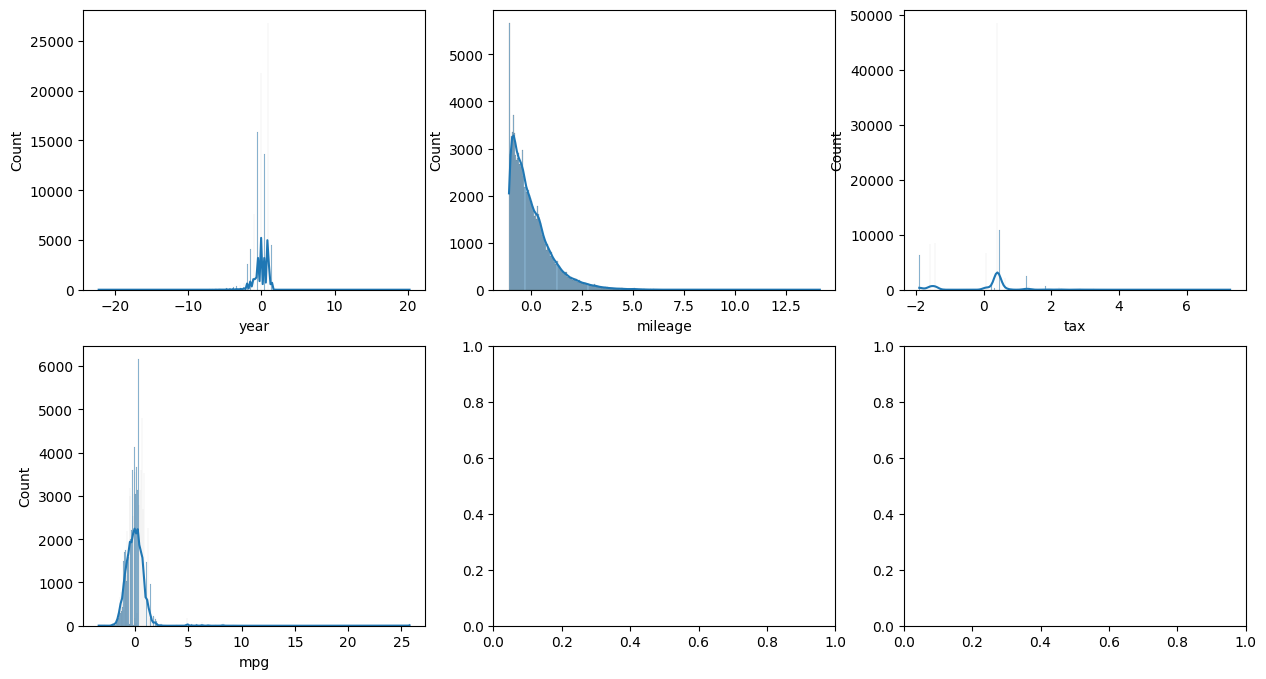

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

_, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=100)

col = 0
row = 0
for i, column in enumerate(["year", "mileage", "tax", "mpg"]):
    sns.histplot(dataset[column], kde=True, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

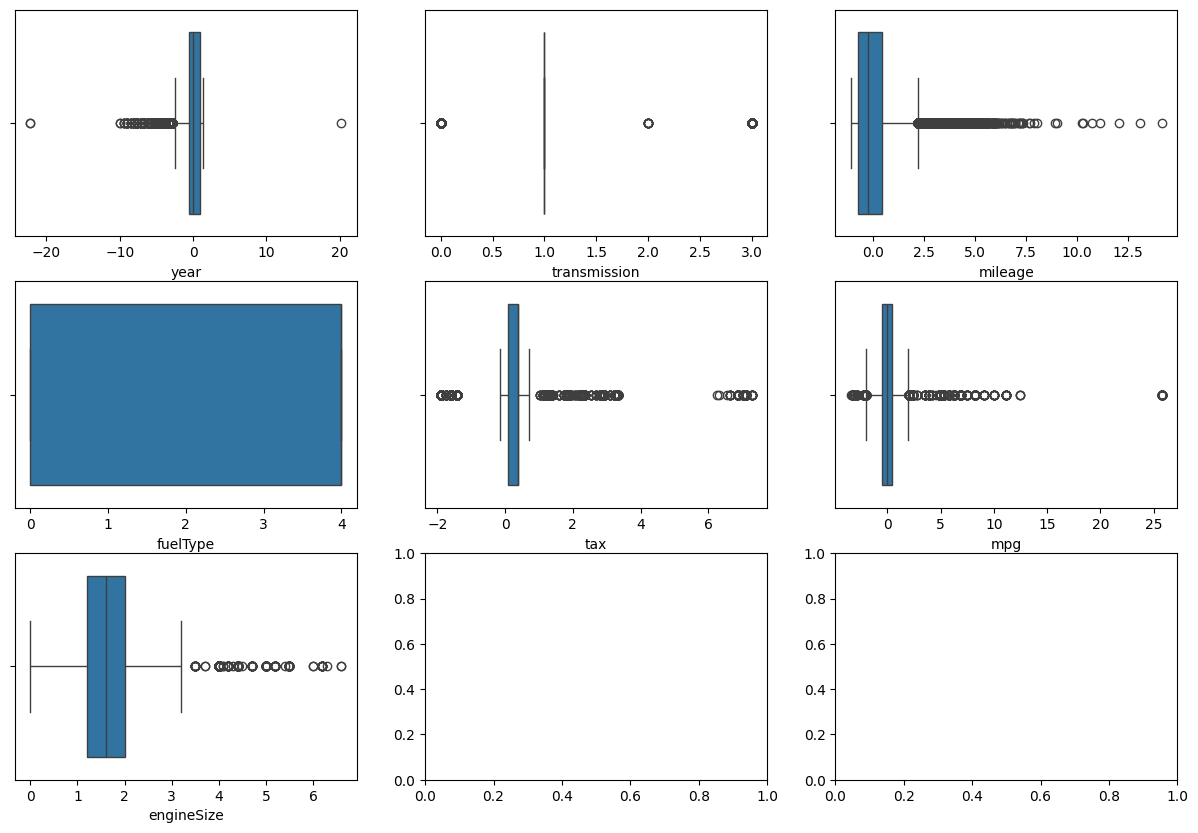

In [14]:
_, axes = plt.subplots(3, 3, figsize=(15, 10), dpi=100)

col = 0
row = 0
for column in ["year", "transmission", "mileage", "fuelType", "tax", "mpg", "engineSize"]:
    sns.boxplot(x=column, data=dataset, ax=axes[col, row])
    col, row = (col+1, 0) if row >= 2 else (col, row+1)

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"], axis=1, inplace=False)
y = dataset[["y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)
print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 79349
Test dataset size: 19838


In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50, criterion="friedman_mse",
    max_depth=30, max_features="sqrt",
    n_jobs=-1, bootstrap=True, oob_score=True,
    random_state=42, verbose=0
)
model.fit(X_train, y_train)

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=42)

In [17]:
model.score(X_test, y_test)

0.9485117787588513

In [18]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0521970507789258


In [19]:
import numpy as np

r_mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {r_mse}")

Root Mean Squared Error: 0.22846673888976882


In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9485117787588513
